# GLD ML Analysis

This notebook summarizes the model experiments and visualizations for the GLD ETF. It displays the generated figures, loads saved models (if any), and provides small code examples to run quick inference on the latest data.

Run `viz_results.py` and `run_tuned_experiments.py` first if you haven't already to generate `figures/` and `models/.`

In [1]:
# Standard imports for the analysis
import os
import pandas as pd
from IPython.display import Image, display
import joblib

print('Environment ready')

Environment ready


## Figures

The script `viz_results.py` writes visualizations into the `figures/` folder. Below we show the heatmap and equity curves if they exist.

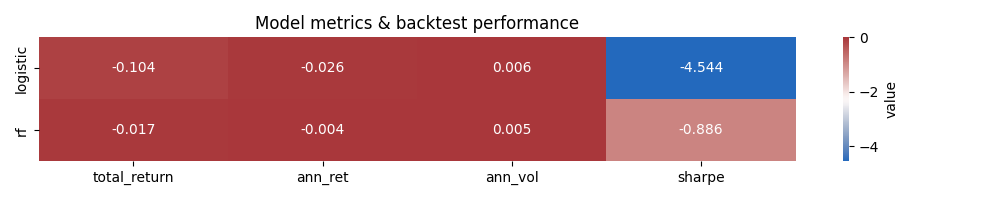

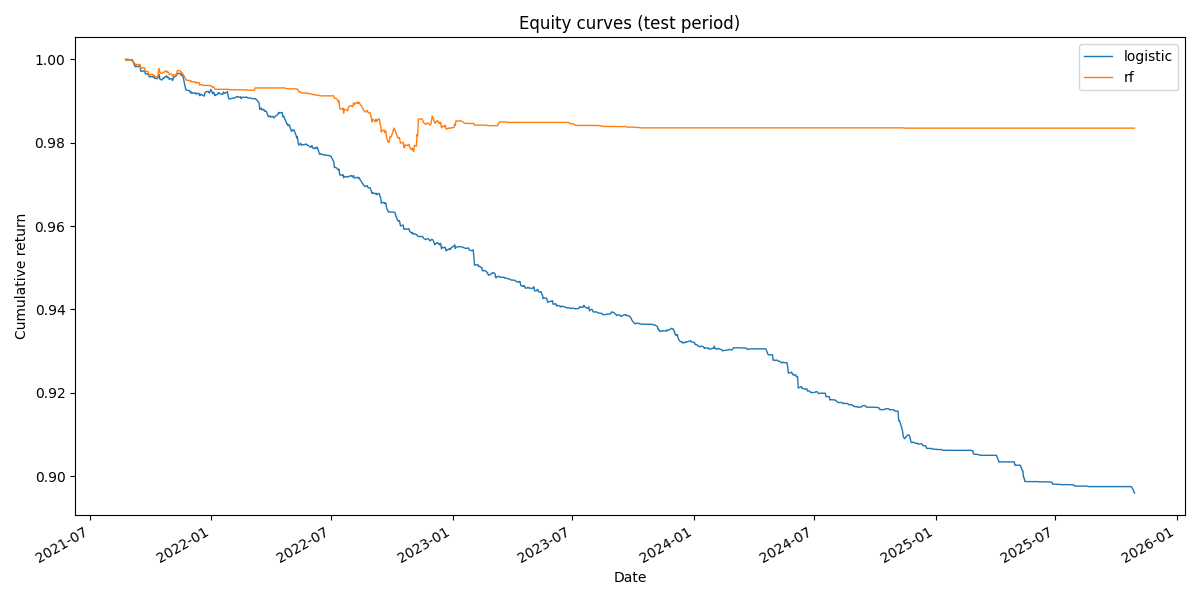

In [2]:
fig_dir = 'figures'
for fname in ['metrics_heatmap.png','equity_curves.png']:
    path = os.path.join(fig_dir, fname)
    if os.path.exists(path):
        display(Image(filename=path))
    else:
        print(f'Missing: {path}')

## Results summary (CSV / JSON)

If present, we can load the CSV summary produced by `viz_results.py` for a quick table view.

In [3]:
summary_csv = 'figures/results_summary.csv'
summary_json = 'figures/results_summary.json'
if os.path.exists(summary_csv):
    df_sum = pd.read_csv(summary_csv, index_col=0)
    display(df_sum)
elif os.path.exists(summary_json):
    import json
    with open(summary_json,'r') as f:
        j = json.load(f)
    display(pd.DataFrame(j).T)
else:
    print('No results_summary found in figures/. Run viz_results.py first.')

,total_return,ann_ret,ann_vol,sharpe
logistic,-0.103998,-0.025986,0.005719,-4.543596
rf,-0.016535,-0.003990,0.004502,-0.886174


## Saved models and quick inference

If you ran `run_tuned_experiments.py`, models are saved to `models/`. This cell lists available models and shows a short example of loading one and making predictions on the most recent prepared features.

In [4]:
models_dir = 'models'
if os.path.exists(models_dir):
    models = [m for m in os.listdir(models_dir) if m.endswith('.joblib')]
    if not models:
        print('No .joblib models found in models/')
    else:
        print('models found:', models)
        # load first model and run a tiny inference example
        mdl_path = os.path.join(models_dir, models[0])
        mdl = joblib.load(mdl_path)
        print('Loaded', models[0])
        # prepare features and run prediction on the last 5 rows
        from features import prepare_features
        csv = 'GLD_daily.csv'
        if os.path.exists(csv):
            X, y, df = prepare_features(csv)
            X_recent = X.tail(5)
            preds = mdl.predict(X_recent)
            print('Recent predictions:', preds)
        else:
            print('GLD_daily.csv not found — put it in workspace root to run inference.')
else:
    print('No models/ directory found. Run run_tuned_experiments.py to produce models.')

models found: ['logistic.joblib', 'rf.joblib']
Loaded logistic.joblib
Recent predictions: [0 0 1 1 1]
Loaded logistic.joblib
Recent predictions: [0 0 1 1 1]


## Interactive analysis cells

Below are helper cells to load the ensemble top contributors and calibration plot produced by `analyses.py`. Run the cell to display the top contributors table and the calibration image. You can edit these cells to add Plotly interactivity.


In [ ]:
# Display top contributors and calibration
import os
import pandas as pd
from IPython.display import Image, display

top_fn = 'figures/analysis_ensemble_top_contributors.csv'
calib_fn = 'figures/analysis_ensemble_calib.png'

if os.path.exists(top_fn):
    display(pd.read_csv(top_fn))
else:
    print('Top contributors file missing:', top_fn)

if os.path.exists(calib_fn):
    display(Image(calib_fn))
else:
    print('Calibration image missing:', calib_fn)
